# Домашнее задание 4 - предобработка признаков, pandas

### Выполнила: Балакирева Дарья Сергеевна, НПМбд-01-19б

Дата выдачи: 28.09.2022

Срок сдачи: 09.10.2022 23:59 MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW4_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW4_IvanovII.ipynb*). Необходимо выложить файл с решением в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [106]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [108]:
def max_element(arr):
    x_max = np.amin(arr)
    s = 0
    for i in range(1, len(arr)):
        if arr[i-1] == 0 and x_max <= arr[i]:
            x_max = arr[i]
            s = s + 1
    if s == 0:
        return None
    else:
        return x_max

In [109]:
x = np.array([6, 2, 0, 10, 0, 0, 8, 7, 0])
print(max_element(x))

10


In [110]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
print(max_element(x))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [5]:
def nearest_value(X, v):
    return np.argmin(np.abs(X-v))

In [6]:
X = np.arange(0,10).reshape((2, 5)) 
v = 3.6
nearest_value(X, v)

4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [7]:
def scale(X):
    
    s_d = X.std(axis=0)
    s_d[s_d == 0] = 1
                                        # выборочное среднее
    X = X - X.mean(axis=0)
    X /= s_d
    
    return X

In [8]:
X = np.random.randint(1, 10, size=(4,4))
scale(X)

array([[ 0.84852814, -1.5666989 ,  1.64345203,  0.21821789],
       [-1.13137085,  0.87038828, -0.29002095, -0.65465367],
       [-0.84852814,  0.87038828, -0.29002095, -1.09108945],
       [ 1.13137085, -0.17407766, -1.06341014,  1.52752523]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [104]:
def get_stats(X):
    
    print('определитель: ', np.linalg.det(X).round(8))
    print('след: ', np.trace(X).round(8))
    print('наименьший элемент: ', np.min(X).round(8))
    print('наибольший элемент: ', np.max(X).round(8))
    print('норма Фробениуса:', np.linalg.norm(X, ord='fro').round(8))
    print('собственные числа: ', np.linalg.eigvals(X))
    print('Обратная матрица: ', np.linalg.inv(X).round(8))
                      
    return

In [20]:
X = np.random.normal(10, 1, (4, 4))
get_stats(X)

определитель:  -0.20954822
след:  36.78988134
наименьший элемент:  8.06312091
наибольший элемент:  11.41031477
норма Фробениуса: 39.42422437
собственные числа:  [39.24105992+0.j         -2.52991324+0.j          0.03936733+0.02368475j
  0.03936733-0.02368475j]
Обратная матрица:  [[-111.30076799   -8.03962313   -6.13413603  130.92864567]
 [ -82.0460177    -6.72637958   -4.08405121   96.91196058]
 [ 296.15779084   23.28092269   14.84271035 -348.76048483]
 [-119.06062559   -9.82007092   -5.36553324  140.11632607]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [23]:
e = np.empty(100)

for exp_num in range(100):
    X = np.empty(1000)

    for i in range(1000):
        x1 = np.random.normal(0, 1, (10, 10))
        x2 = np.random.normal(0, 1, (10, 10))
        X[i] = np.max(x1.dot(x2))
        
    e[exp_num] = np.average(X)
        
print('Cреднее значение по экспериментам у максимальных элементов: ', np.average(exp))
print('95-процентная квантиль', np.percentile(exp, 95))

Cреднее значение по экспериментам у максимальных элементов:  8.398869519523409
95-процентная квантиль 8.501507459108474


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [4]:
import pandas as pd
%matplotlib inline
data = pd.read_csv('2008.csv')

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [5]:
data['CancellationCode'].value_counts().idxmax()

'A'

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [6]:
print('max = ', data['Distance'].max())
print('min = ', data['Distance'].min())
print('mean = ', data['Distance'].mean())

max =  4962
min =  31
mean =  724.5082571428571


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [7]:
data.loc[data['Distance'] == 31, ['FlightNum', 'Year', 'Month', 'DayofMonth', 'Distance']]

,FlightNum,Year,Month,DayofMonth,Distance
1116,65,2008,12,30,31
6958,65,2008,12,26,31
17349,64,2008,8,18,31
27534,64,2008,3,11,31
46082,65,2008,8,9,31
48112,64,2008,2,28,31


In [8]:
data.loc[(data['FlightNum'] == 64) | (data['FlightNum'] == 65), ['FlightNum', 'Year', 'Month', 'DayofMonth', 'Distance']]

,FlightNum,Year,Month,DayofMonth,Distance
501,64,2008,3,20,533
1116,65,2008,12,30,31
1389,64,2008,3,13,680
1517,65,2008,7,10,680
2619,64,2008,5,23,2381
...,...,...,...,...,...
66529,65,2008,12,21,82
67172,64,2008,3,22,533
68264,65,2008,9,7,386
68338,65,2008,8,3,2454


**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [9]:
data['Origin'].value_counts().idxmax()

'ATL'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [10]:
data.loc[:, ['Origin', 'AirTime']].groupby(['Origin']).agg('mean').sort_values(by='AirTime')

,AirTime
Origin,
GST,13.000000
WRG,18.000000
OXR,19.666667
PSG,20.250000
MKG,21.500000
...,...
STT,185.029412
PSE,191.875000
BQN,193.954545


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [84]:
data2 = data.loc[data['DepDelay'] > 0, ['Origin', 'DepDelay']].groupby(['Origin']).agg('sum').filter(data['Origin'].value_counts() >= 1000)
data2

""
Origin
ABE
ABI
ABQ
ABY
ACK
...
VPS
WRG
XNA


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [12]:
print(data.isnull().sum())

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


Видно, что в данных есть пропуски

In [14]:
print('Всего пропущенных элементов:', data.isnull().sum().sum())

Всего пропущенных элементов: 355215


In [17]:
print('Количество объектов, имеющих хотя бы 1 пропуск:', np.count_nonzero(np.array(data.isnull().sum(axis = 1))))

Количество объектов, имеющих хотя бы 1 пропуск: 70000


In [19]:
print('Количество признаков, имеющих хотя бы 1 пропуск:', np.count_nonzero(np.array(data.isnull().sum())))

Количество признаков, имеющих хотя бы 1 пропуск: 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [21]:
print(data['DepDelay'].isnull().sum())

1399


В целевой переменной есть пропущенные значения

In [23]:
print(data[data['DepDelay'].isnull() == True])

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1          21          1      NaN        1630      NaN   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
11           1940    

In [24]:
print(data[data['DepDelay'].isnull() == False])

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0      2008      6          18          3   2111.0        2055   2308.0   
1      2008      6           4          3   1426.0        1410   1730.0   
2      2008      8           3          7   1143.0        1145   1501.0   
3      2008      1          23          3   1141.0        1144   1323.0   
4      2008      5           4          7    815.0         820   1243.0   
...     ...    ...         ...        ...      ...         ...      ...   
69995  2008      5          12          1   1829.0        1840   2137.0   
69996  2008      5          11          7   1149.0        1125   1336.0   
69997  2008      9          24          3   1012.0        1012   1132.0   
69998  2008      2          18          1   1906.0        1900   2200.0   
69999  2008     12           6          6    859.0         900    959.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0            2300    

In [33]:
print('Количество отмененных рейсов, для которых нет данных по "DepDelay":',
    len(data[(data['Cancelled'] == 1) & (data['DepDelay'].isnull() == True)]))

Количество отмененных рейсов, для которых нет данных по "DepDelay": 1399


In [36]:
print('Количество отмененных рейсов, для которых есть данные по "DepDelay":',
      len(data[(data['Cancelled'] == 1) & (data['DepDelay'].isnull() == False)]))

Количество отмененных рейсов, для которых есть данные по "DepDelay": 12


In [37]:
print('Количество пустых строк для признака "CancellationCode":',
      data.loc[:, 'CancellationCode'].isnull().sum())

Количество пустых строк для признака "CancellationCode": 68589


In [38]:
print('Суммарное количество рейсов:',len(data))

Суммарное количество рейсов: 70000


In [45]:
print('Количество пустых строк по последним столбцам:')
print(data.loc[:, ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].isnull().sum())

Количество пустых строк по последним столбцам:
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


In [46]:
print('Количество объектов, для которых значение признака "Diverted" равно нулю:',
     len(data[data['Diverted'] == 0]))

Количество объектов, для которых значение признака "Diverted" равно нулю: 69829


In [47]:
print('Количество объектов, для которых значение признака "Diverted" равно нулю и ненулевое значение "DepDelay":',
     len(data[(data['Diverted'] == 0) & (data['DepDelay'] != 0)]))

Количество объектов, для которых значение признака "Diverted" равно нулю и ненулевое значение "DepDelay": 64651


Все рейсы,в которых нет значения целевой переменной, были отменены. 
В связи с этим,можно не рассматривать  признак 'Cancelled', даже несмотря на то,
что в таблице есть 12 рейсов, для которых при непустом значении 'DepDelay' являются 
непустыми и значения признака 'Cancelled', т. к. их количество относительно 
общего числа строк очень мало. Также можно не рассматривать признаки 'CancellationCode',
'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 
т. к. первый из них почти на 98% пустой, а оставшиеся имеют около 78% пустых значений. 
Также удалим признак 'Diverted', т. к. он, по моему мнению, не поможет в предсказании.

In [48]:
df = pd.read_csv('2008.csv')

In [49]:
df = df[(df['DepDelay'].isnull() == False)]
df = df[(df['DepDelay'] != 0)]
df.drop(['Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', \
         'Diverted'], axis = 1, inplace = True)

In [50]:
df.index = np.arange(len(df))
y = np.array(df['DepDelay'])
X = df.drop('DepDelay', axis = 1)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [52]:
print(X.loc[:, ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']].isnull().sum())

DepTime         0
CRSDepTime      0
ArrTime       140
CRSArrTime      0
dtype: int64


In [53]:
def get_hour(n):
    nums = list(map(str, str(int(n))))
    hours = ''.join(nums[:-2])
    return hours

def get_min(n):
    nums = list(map(str, str(int(n))))
    minutes = ''.join(nums[-2:])
    return minutes

In [54]:
X_at = X[X['ArrTime'].isnull() == False]

In [55]:
X['DepTime_Hour'] = pd.to_numeric(X['DepTime'].apply(get_hour))
X['DepTime_Minute'] = pd.to_numeric(X['DepTime'].apply(get_min))
X['CRSDepTime_Hour'] = pd.to_numeric(X['CRSDepTime'].apply(get_hour))
X['CRSDepTime_Minute'] = pd.to_numeric(X['CRSDepTime'].apply(get_min))
X['ArrTime_Hour'] = pd.to_numeric(X_at['ArrTime'].apply(get_hour))
X['ArrTime_Minute'] = pd.to_numeric(X_at['ArrTime'].apply(get_min))
X['CRSArrTime_Hour'] = pd.to_numeric(X['CRSArrTime'].apply(get_hour))
X['CRSArrTime_Minute'] = pd.to_numeric(X['CRSArrTime'].apply(get_min))

In [56]:
X.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis = 1, inplace = True)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [58]:
X.drop(['TailNum', 'Year'], axis = 1, inplace = True)
numeric_data = X.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

In [59]:
import seaborn as sns

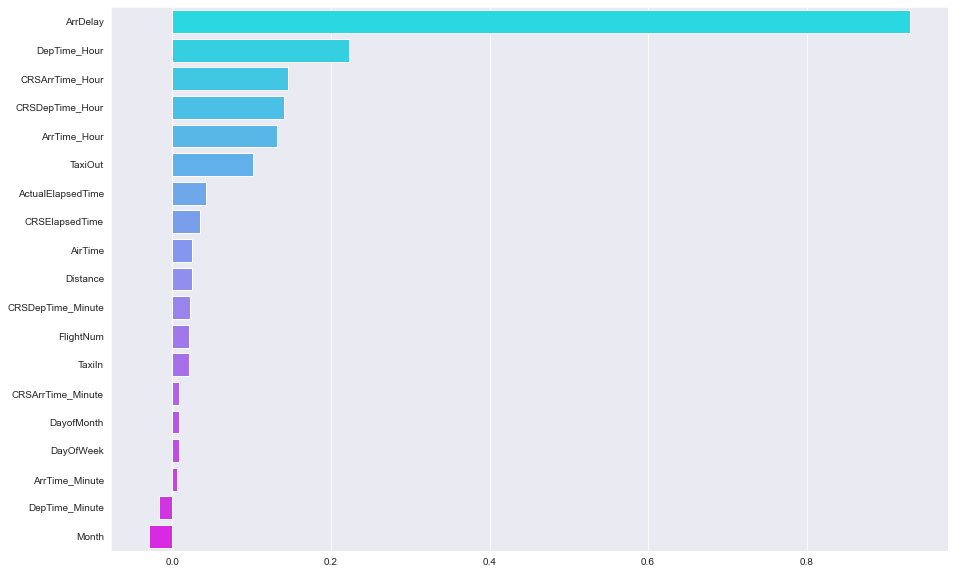

In [63]:
X_f = X.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_f[feature], y)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]


plot = sns.barplot(y = features_order, x = correlations, palette = 'cool')
plot.figure.set_size_inches(15, 10)

Единственным сильно коррелирующим признаком является 'ArrDelay', поэтому исключим его из выборки.

In [64]:
X.drop('ArrDelay', axis = 1, inplace = True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

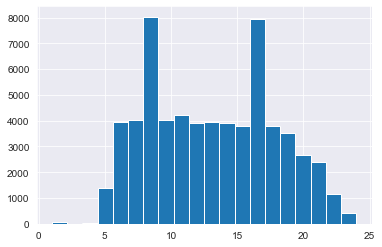

In [65]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

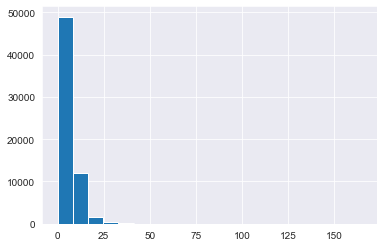

In [66]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

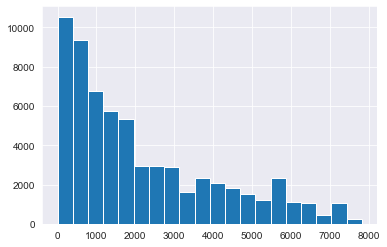

In [67]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

На графиках видно, что разные признаки принимают значения из значительно отличающихся диапозонов, значения их отличаются на порядки. Масштабирование поможет уравнять признаки, их возможную значимость для модели.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
def transform_data(data):
    numeric_features = data.select_dtypes([np.number]).columns
    object_features = data.select_dtypes([object]).columns
    data[numeric_features] = data[numeric_features].fillna(0)
    data[object_features] = data[object_features].fillna('nan')
    
    scaler = StandardScaler()
    data[numeric_features] = scaler.fit_transform(data[numeric_features])
    
    object_data_transform = pd.get_dummies(data[object_features])
    data = pd.concat([data, object_data_transform], axis = 1)
    
    data.drop(object_features, axis = 1, inplace = True)
    
    return data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [71]:
X_new = transform_data(X)
X_new

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,0
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,0
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,0


После преобразования получилось 632 признака

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_new = np.array(X_new)
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 15)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
x_train_part = x_train[:1000]
y_train_part = y_train[:1000]

regr = LinearRegression().fit(x_train_part, y_train_part)

y_train_part_pred = regr.predict(x_train_part)
y_pred = regr.predict(x_test)

y_train_part_mse = mean_squared_error(y_train_part, y_train_part_pred)
y_mse = mean_squared_error(y_test, y_pred)

y_train_part_r2 = r2_score(y_train_part, y_train_part_pred)
y_r2 = r2_score(y_test, y_pred)

print('MSE подвыборки:', y_train_part_mse, '\n' 'MSE контрольной выборки:', y_mse, '\n' 'R^2 подвыборки:', y_train_part_r2, 
     '\n' 'R^2 контрольной выборки:', y_r2)

MSE подвыборки: 618.5508565979004 
MSE контрольной выборки: 1.5384979617162188e+24 
R^2 подвыборки: 0.4954161657982733 
R^2 контрольной выборки: -1.1970927572869322e+21


In [76]:
regr.coef_

array([-4.39969258e-01,  1.69924953e+00, -3.86686750e-01,  2.93700423e+00,
        4.84873696e+01, -7.58109042e+00, -5.31820299e+01,  1.34629764e+01,
       -1.82952544e+00, -4.10101136e+00,  2.82338461e+01,  1.63705995e+00,
       -2.28832440e+01, -2.13089385e+00, -2.05120583e+01,  1.35320999e+00,
        1.99102484e+01,  1.43517127e+00,  1.65728070e+13,  1.65728070e+13,
        1.65728070e+13,  1.65728070e+13,  1.65728070e+13,  1.65728070e+13,
        1.65728070e+13,  1.65728070e+13,  1.65728070e+13,  1.65728070e+13,
        1.65728070e+13,  1.65728070e+13,  1.65728070e+13,  1.65728070e+13,
        1.65728070e+13,  1.65728070e+13,  1.65728070e+13,  1.65728070e+13,
        1.65728070e+13,  1.65728070e+13,  4.66770846e+12,  4.66770846e+12,
        4.66770846e+12,  5.16897221e+12,  3.23263242e+12,  1.61153398e+11,
       -6.96632231e+10, -1.30118637e+12,  7.48676667e+12,  4.42803494e+12,
        4.66770846e+12, -1.87795958e+12, -3.61810946e+11,  4.66770846e+12,
       -2.12566727e+12, -

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [77]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [79]:
model_lasso = Lasso().fit(x_train_part, y_train_part)
model_ridge = Ridge().fit(x_train_part, y_train_part)

lasso_zeros = np.sum(model_lasso.coef_ == 0)
ridge_zeros = np.sum(model_ridge.coef_ == 0)
print('Zero weights in Lasso:', lasso_zeros)
print('Zero weights in Ridge:', ridge_zeros)

Zero weights in Lasso: 624
Zero weights in Ridge: 290


In [80]:
import matplotlib.pyplot as plt

C:\Users\Daria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289833.69582750305, tolerance: 122.58634040000001
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267582.8274448623, tolerance: 122.58634040000001
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220920.975896249, tolerance: 122.58634040000001
  model = cd_fast.enet_coordinate_descent(
C:\Users\Daria\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

Text(0, 0.5, 'Ridge not zeros')

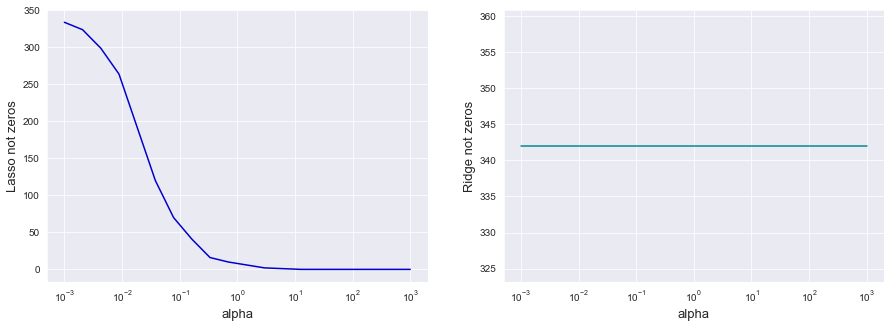

In [81]:
alphas = np.logspace(-3, 3, 20)
lasso_not_zeros = list()
ridge_not_zeros = list()
for i in range(len(alphas)):
    model_lasso_alph = Lasso(alphas[i]).fit(x_train_part, y_train_part)
    model_ridge_alph = Ridge(alphas[i]).fit(x_train_part, y_train_part)
    lasso_not_zeros.append(np.sum(model_lasso_alph.coef_ != 0))
    ridge_not_zeros.append(np.sum(model_ridge_alph.coef_ != 0))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_not_zeros, color = 'mediumblue')
plt.xscale('log')
plt.xlabel('alpha', fontsize=13)
plt.ylabel('Lasso not zeros', fontsize=13)

plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_not_zeros, color = 'darkcyan')
plt.xscale('log')
plt.xlabel('alpha', fontsize=13)
plt.ylabel('Ridge not zeros', fontsize=13)

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False)

Предсказание для тестовой выборки

In [84]:
y_ridge_pred = model_ridge.predict(x_test)

print('RMSE:', rmse(y_test, y_ridge_pred), '\n' 'MAE:', mean_absolute_error(y_test, y_ridge_pred), '\n' 'R^2:', \
      r2_score(y_test, y_ridge_pred))

RMSE: 37.50670876079011 
MAE: 21.25851613343453 
R^2: -0.09458323078032449


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

Best alpha = 26.3665
Best alpha = 26.3665
Best alpha = 54.5559


Text(47.0, 0.5, 'CV score r^2')

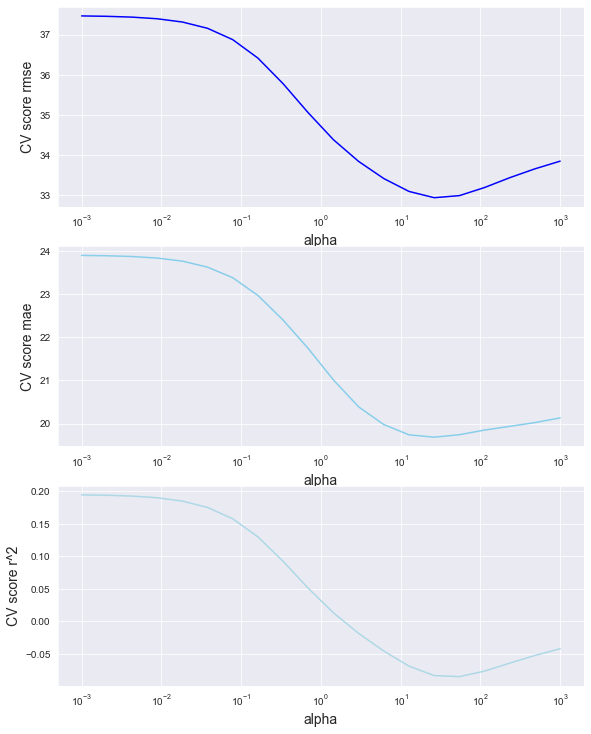

In [103]:
from sklearn.model_selection import GridSearchCV

parametrs = {'alpha': alphas}


searcher_rmse = GridSearchCV(Ridge(), parametrs, scoring=rmse_scorer, cv=5).fit(x_train_part, y_train_part)
searcher_mae = GridSearchCV(Ridge(), parametrs, scoring='neg_mean_absolute_error', cv=5).fit(x_train_part, y_train_part)
searcher_rsqv = GridSearchCV(Ridge(), parametrs, scoring='r2', cv=5).fit(x_train_part, y_train_part)

best_alpha_rmse = searcher_rmse.best_params_['alpha']
best_alpha_mae = searcher_mae.best_params_['alpha']
best_alpha_rsqv = searcher_rsqv.best_params_['alpha']
print("Best alpha = %.4f" % best_alpha_rmse)
print("Best alpha = %.4f" % best_alpha_mae)
print("Best alpha = %.4f" % best_alpha_rsqv)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 10))
fig.tight_layout(h_pad=2)

ax1.plot(alphas, -searcher_rmse.cv_results_["mean_test_score"], color = 'blue')
ax1.set_xscale("log")
ax1.set_xlabel("alpha", fontsize = 14)
ax1.set_ylabel("CV score rmse", fontsize = 14)

ax2.plot(alphas, -searcher_mae.cv_results_["mean_test_score"], color = 'SkyBlue' )
ax2.set_xscale("log")
ax2.set_xlabel("alpha", fontsize = 14)
ax2.set_ylabel("CV score mae", fontsize = 14)

ax3.plot(alphas, -searcher_rsqv.cv_results_["mean_test_score"], color = 'lightblue')
ax3.set_xscale("log")
ax3.set_xlabel("alpha", fontsize = 14)
ax3.set_ylabel("CV score r^2", fontsize = 14)

In [86]:
model_ridge_rmse = Ridge(best_alpha_rmse).fit(x_train_part, y_train_part)
model_ridge_mae = Ridge(best_alpha_mae).fit(x_train_part, y_train_part)
model_ridge_rsqv = Ridge(best_alpha_rsqv).fit(x_train_part, y_train_part)

Предсказание для тестовой выборки

In [87]:
y_ridge_pred_rmse = model_ridge_rmse.predict(x_test)
y_ridge_pred_mae = model_ridge_mae.predict(x_test)
y_ridge_pred_rsqv = model_ridge_rsqv.predict(x_test)

print('RMSE:', rmse(y_test, y_ridge_pred_rmse), '\n' 'MAE:', mean_absolute_error(y_test, y_ridge_pred_mae), '\n' 'R^2:', \
      r2_score(y_test, y_ridge_pred_rsqv))

RMSE: 34.49988365744824 
MAE: 18.958660160999663 
R^2: 0.07322198818631576


Качество изменилось в положительную сторону

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [88]:
from sklearn.model_selection import cross_val_predict

Text(0.5, 0, 'Ошибка')

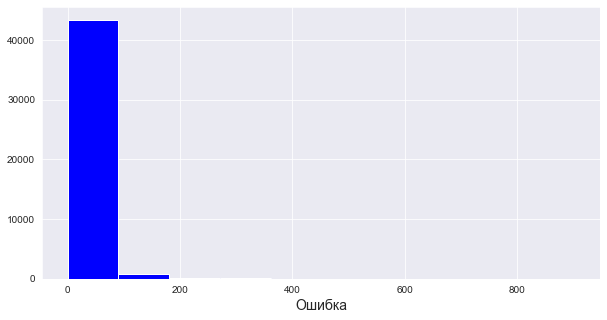

In [94]:
pred_train = cross_val_predict(Ridge(), x_train, y_train)
error = np.abs(y_train - pred_train)

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(error, facecolor = 'blue')
ax.set_xlabel('Ошибка', fontsize=14)

In [92]:
print(len(y_train))

44382


Из графика видно, что предсказания происходят с ошибкой,
для большинства из них ошибка по абсолютному значению составляет примерно до 100.

## Вывод

Обрабатывать данные можно и мы немного научились это делать, но это соложно ;(